# CLI Forecaster


#### The composite leading indicator (CLI)


- The composite leading indicator (CLI) is designed to provide early signals of turning points in business cycles. It is believed by some economist that the CLI can infer the future economy in advance of the business cycle by 6-9 months.


- The goal is for Businesses and investors to use the index to help plan their activities around the expected performance of the economy and protect themselves from economic downturns. 


- It is important to realise that CLIs are gathered in qualitative (surveys) means rather than quantitative terms, hence they are published every month.



#### The Business confidence index (BCI)

- The business development index provides information on future development. 

- This is mainly driven by opinion surveys on production, orders and stocks of finished products in the many industry sectors.

- Just like the CLI, the BCI can be used to monitor and anticipate market turning points.

- When BCI value is above 100 it suggest an increase in confidence for business performance whilst values below 100 indicate pessimism towards business performance.


#### The Consumer confidence index (CCI)

- The consumer confidence index provides an indication of developments in households.


- Consumption and savings are key factors for developing the CCI. These factors are weighted accordingly due to the general economic situation, unemployment and capability of saving. The CCI data is also gathered qualitatively.


- When the CCI is above 100 it indicates a boost in consumer confidence towards the future economy, hence they are more likely to spend more and save less (consumers tend to do major purchases within 12 months). 
- When CCI is below 100 consumers are more pessimistic towards future developments in the economy, as a result will they will save more and consume less.




#### Which report is being used?

- It is important to note that you can track CLIs for each individual countries.


- For this project we have chosen to go with OECD reports as the OECD members collectively represent around 60% of Global GDP yearly. This will enable us to have a more holistic view of the current global markets.





 



#### Who are the OECD?

- The organization for economic coorperation and development (OECD) is an international economic organisation which comprises of 37 countries. All members of the organisation are commited to the market economy and therby use the platform to share and compare policy expriences and seek answers to common problems.

#### What are we actually looking at?


- What we are looking at is an aggregate of economic information from 37 countries.

- The OECD CLI is made of 170 reports and it covers many short term indicators within it; each country contributes 5-10 reports monthly.

Some of the short term indicators include:
- Business Confidence surveys
- Orders
- Inventory numbers
- Share prices of individual stock market indexes etc... 

When the CLI is above the 100 line that means the economy is expanding whereas when it is below tje 100 the economy is contracting.




#### Improvements 

You can certainly add more global players like China, India and Brazil CLI reports to get an even more rounded view of the global economic market.

Here is the link for OECD database

#### Advice

-  if you are a trend-follower, when the BCI is rising or at least above 100 and the markets are trending up you can assume bullishness and vice versa. When they don't agree or worse when they really don't agree, one should be very concerned - as it's hard to know which side is right, it may be best to minimize risk and wait things out.

In [7]:
import matplotlib 
import matplotlib.pyplot as plt 
import pandas_datareader as dt
import io, base64, os, json, re , math
import pandas as pd 
import numpy as np
import datetime
import warnings

In [8]:
%matplotlib inline
warnings.filterwarnings('ignore')

- Get the data from the OECD website


Read the API documentation if you need to get different datasets https://data.oecd.org/api/sdmx-json-documentation/


In [9]:

# CLI data
cli_live_data=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.CLI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
cli_live_data

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CLI,AMPLITUD,LTRENDIDX,M,1961-06,101.02190,NaN
1,OECD,CLI,AMPLITUD,LTRENDIDX,M,1961-07,101.11190,NaN
2,OECD,CLI,AMPLITUD,LTRENDIDX,M,1961-08,101.15200,NaN
3,OECD,CLI,AMPLITUD,LTRENDIDX,M,1961-09,101.14760,NaN
4,OECD,CLI,AMPLITUD,LTRENDIDX,M,1961-10,101.11200,NaN
...,...,...,...,...,...,...,...,...
701,OECD,CLI,AMPLITUD,LTRENDIDX,M,2019-11,99.37080,NaN
702,OECD,CLI,AMPLITUD,LTRENDIDX,M,2019-12,99.46034,NaN
703,OECD,CLI,AMPLITUD,LTRENDIDX,M,2020-01,99.53123,NaN
704,OECD,CLI,AMPLITUD,LTRENDIDX,M,2020-02,99.56530,NaN


In [10]:
set(cli_live_data['LOCATION'])

{'OECD'}

#### Clean up the data and use the neccesary columns


- The time column seems to not have a day information so we will append the last days month to all rows

In [11]:
import calendar

In [12]:

full_date_list=[]

#loop through each date and append to list
for date in cli_live_data['TIME']:
    #get the year date for each row
    year=int(date.split('-')[0])
    #get the month date for each row
    month=int(date.split('-')[1])
    #append full date to empty list
    #pass the month and year information to calendar library to get end of month days data according to the year
    full_date_list.append(str(calendar.monthrange(year,month)[1])+ '-' + str(month) + '-'+ str(year))



- Show the new CLI dataframe

In [13]:
#Add the full date into dataframe
cli_live_data['Date']=full_date_list
cli_live_data['Date']=pd.to_datetime(cli_live_data['Date'])


In [14]:
cli_tmp=cli_live_data[['Date','Value']]

#use a date cut off point to discard data before 1970s
cli_tmp= cli_tmp[cli_tmp['Date'] >='1970-01-01']

cli_tmp

,Date,Value
103,1970-01-31,99.89616
104,1970-02-28,99.71776
105,1970-03-31,99.54112
106,1970-04-30,99.37284
107,1970-05-31,99.22804
...,...,...
701,2019-11-30,99.37080
702,2019-12-31,99.46034
703,2020-01-31,99.53123
704,2020-02-29,99.56530


- Plot the CLI graph starting from 1970s to today's last datapoint. 




- As you may have noticed the CLI flactuates around the 100 line which is assumed to be the neutral line. Whenever the CLI is above the neutral line, it is assumed that the economy is expanding more rapidly compared to long term trend and when it is below the 100 line it is belived the economy is contracting.

In [15]:
#%%html
#<img src='1.png' , centre, width=500, height=500, align="centre">

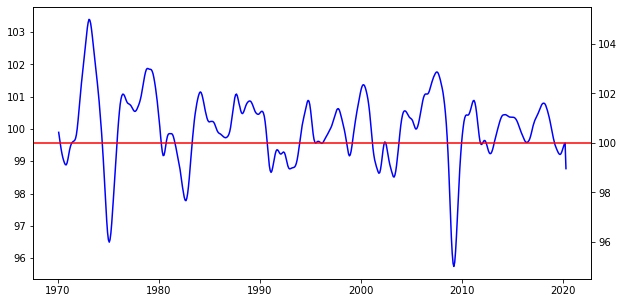

In [16]:

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(cli_tmp['Date'], cli_tmp['Value'], label='CLI', 
         color='blue')


second_axis=ax.twinx()
second_axis.axhline(y=100, color='red')


### Get the SPX index in order to compare and explore the two datasets


- The SPX is used for this case as it is the most liquid and the largest index in the world. Most of the money traded around the world is traded using the companies in the SP500 hence it is a good index to represent the overall health in the market.


In [17]:
#We will be using only the Adj close prices
all_spx_data= dt.DataReader('^GSPC', 'yahoo', start='01-01-1970')

#all_spx_data['Date'] = pd.to_datetime(all_spx_data['Date'])

spx_data=all_spx_data[['Adj Close']]

#sort data from oldest to newest
spx_data=spx_data.sort_values('Date', ascending=True)


In [18]:
spx_data

,Adj Close
Date,
1970-01-02,93.000000
1970-01-05,93.459999
1970-01-06,92.820000
1970-01-07,92.629997
1970-01-08,92.680000
...,...
2020-05-01,2830.709961
2020-05-04,2842.739990
2020-05-05,2868.439941


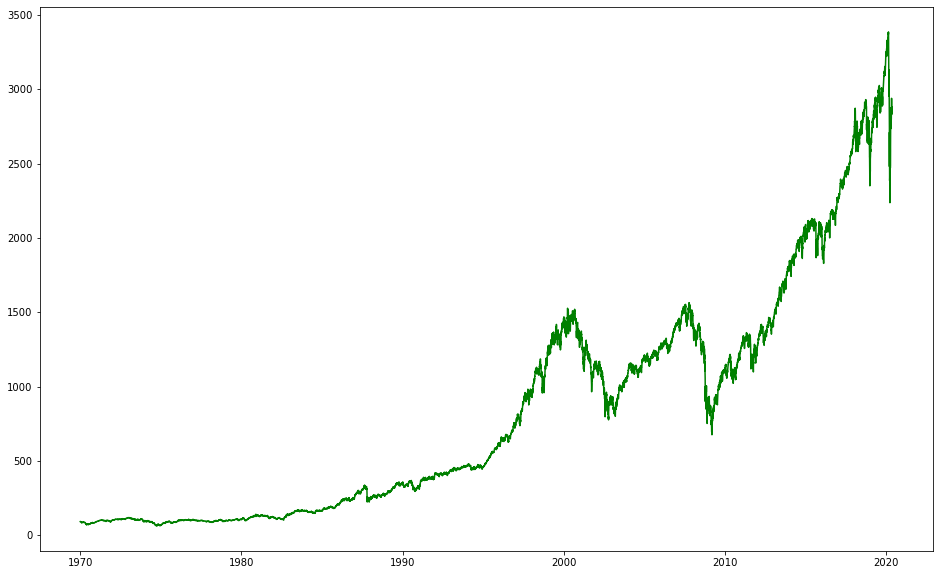

In [19]:

fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(spx_data, label='SPX', 
         color='green')

#### Plot the two datframes together


- This will enable us to compare the actual market flactuations in relation to the CLI indicator. 





In [20]:
cli_tmp_2= cli_tmp.copy()

spx_data_2=spx_data.copy()


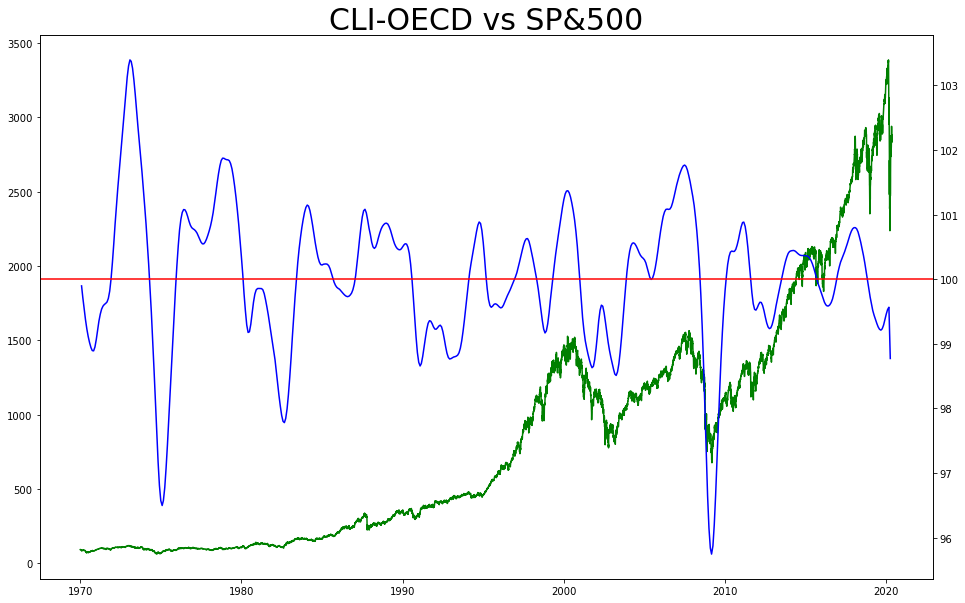

In [21]:

fig, ax = plt.subplots(figsize=(16, 10))

plt.plot(spx_data_2, label='CLI', 
         color='green')


second_axis= ax.twinx()

plt.plot(cli_tmp_2['Date'], cli_tmp_2['Value'], label='CLI', 
         color='blue')

plt.title('CLI-OECD vs SP&500', fontsize=30)

second_axis.axhline(y=100, color='red')



### Forcasting

- We can see that there is some cyclicality in data which corresponds with the market contraction and expansion. What we will do here is forecast the CLI even further to predict future market trends.

In [22]:
#See the dimention of dataframe
cli_tmp_2.shape


(603, 2)

- We will split the data for testing and training purposes. This is a common practice in data science field when building a model.



- We will split the data 70/30 -> 70% for training and 30% for testing.


- We will not shuffle or mix the order of the rows as this is a time series data

In [259]:
#Use the first 500 rows for training purposes
train= cli_tmp_2[0:423]
#Use the last 100 rows for testing 
test=cli_tmp_2[423:]

all_df=cli_tmp_2

In [260]:
#set the index for the datasets
train.index=train['Date']
test.index=test['Date']
all_df.index= all_df['Date']

#### Plot the data 

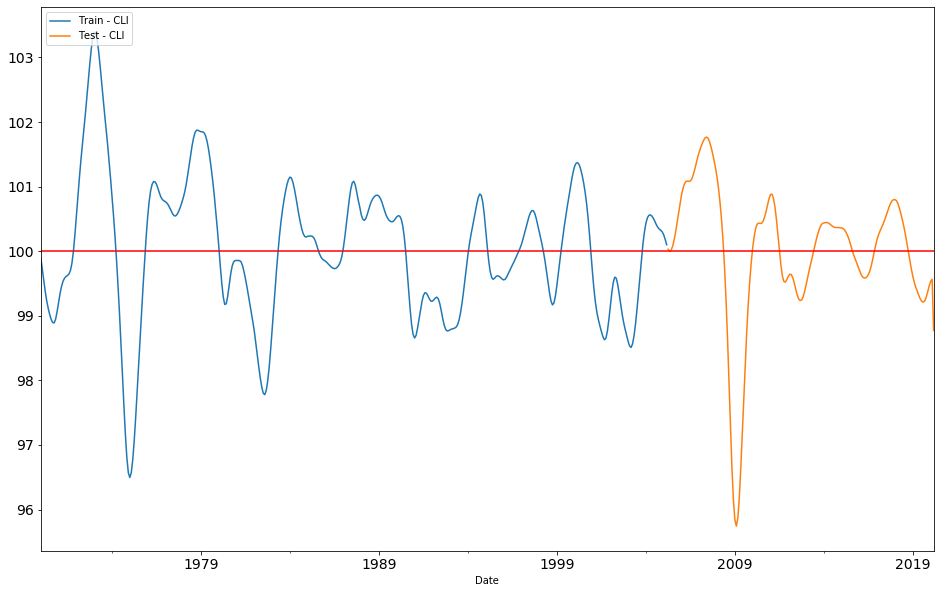

In [261]:
fig,ax = plt.subplots(figsize=(16,10))

train['Value'].plot(label='Train - CLI', fontsize=14)
test['Value'].plot(label='Test - CLI', fontsize=14)

plt.legend(loc='upper left')
ax.axhline(y=100, color='red')

plt.show()

#### Model

- We will be using the Holt Winter's Exponential Smoothing to capture trends and seasonality in one go.  


- Holts Winter Exponential smoothing allows us to forecast without the need to decompose the graph into smaller subsections (trend and seasonlity) to do the forecasting. 



- With this model we will able to capture additive and multiplicative seasonality aswell as trends.


- There are three parameters to control speed of learning


- To learn more about the Holt-Winter model check this article out:         
https://thenewstack.io/when-holt-winters-is-better-than-machine-learning/




In [262]:
#https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
from patsy import dmatrices

decompose = sm.tsa.seasonal_decompose(train['Value'].tail(200), model='multiplicative')

- Here we will check for cyclicality



- We are essentially recording how many months it takes from one peak to another peak in the CLI.


- Is is good practice to plot to see what is going on


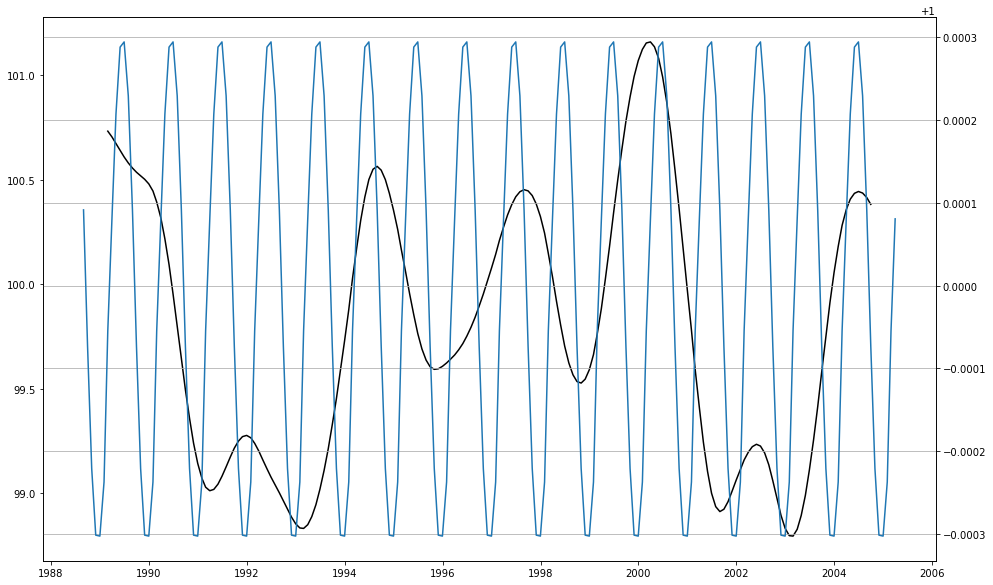

In [263]:
#Plot the graph to see the cycality period
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(decompose.trend, color='black')

ax.twinx()

plt.plot(decompose.seasonal)

plt.grid()

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


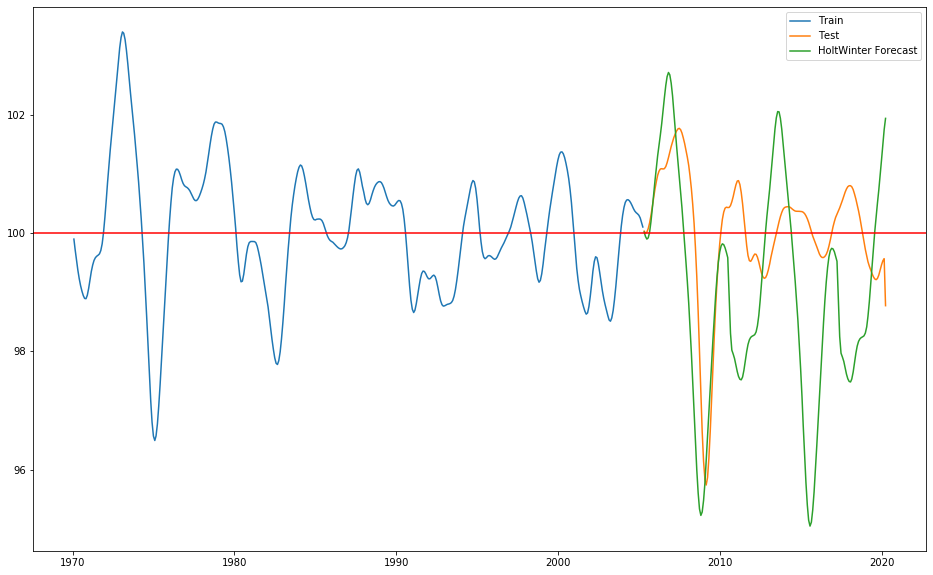

In [264]:
#Trained model
exp_smooth_fit= sm.tsa.ExponentialSmoothing(train['Value'],
                                           seasonal_periods=81,
                                           trend='add',
                                           seasonal='add',
                                           damped=True).fit()



#Forecast using the trained model without seeing the test data
test['Holt_Winter']=exp_smooth_fit.forecast(len(test))

fig, ax= plt.subplots(figsize=(16,10))
#plot train data
plt.plot( train['Value'], label='Train')
#plot actual test data
plt.plot(test['Value'], label='Test')
#plot the models forcast 
plt.plot(test['Holt_Winter'], label= 'HoltWinter Forecast')

ax.axhline(y=100, color='red')
plt.legend(loc='best')
plt.show()

#### What have we done so far?

- We have used an Exponential Smoothing Model to learn 600 datapoint (months) from the CLI


- We have forcasted the next 180 months using the trained model  and overlayed the actual test data.

- We observed that the model forecast drifts away from the true value as we increase the time horizon but it is quite a good for shorter periods.




#### The final steps

- We will use the trained model and forecast shorter time horizon.


- We will forecast the next 24 months as the model is more acurate in the shorter run.      
*we forecasted the next 180 months before*

In [265]:
import datetime
from dateutil import relativedelta

In [266]:
#print(all_df['Date'].values[-1])
print(relativedelta.relativedelta(months=1))

relativedelta(months=+1)


- Train the model using all of the data available

In [267]:
exp_smooth_fit= sm.tsa.ExponentialSmoothing(all_df['Value'],
                                           seasonal_periods=81,#Use the same parameter as before
                                           trend='add',
                                           seasonal='add',
                                           damped=True).fit()

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


- Make a new df that has all the future dates (the next 24 months) and append it to a list.


In [268]:

months_out=24

new_dates=[]
for month_ in range(1, months_out+1):
    nextmonth= pd.to_datetime(str(all_df['Date'].values[-1])) +relativedelta.relativedelta(months=month_)
    print(nextmonth)
    new_dates.append(nextmonth)
    

2020-04-30 00:00:00
2020-05-31 00:00:00
2020-06-30 00:00:00
2020-07-31 00:00:00
2020-08-31 00:00:00
2020-09-30 00:00:00
2020-10-31 00:00:00
2020-11-30 00:00:00
2020-12-31 00:00:00
2021-01-31 00:00:00
2021-02-28 00:00:00
2021-03-31 00:00:00
2021-04-30 00:00:00
2021-05-31 00:00:00
2021-06-30 00:00:00
2021-07-31 00:00:00
2021-08-31 00:00:00
2021-09-30 00:00:00
2021-10-31 00:00:00
2021-11-30 00:00:00
2021-12-31 00:00:00
2022-01-31 00:00:00
2022-02-28 00:00:00
2022-03-31 00:00:00


- Forcast the next 24 months with the model trained using all of the CLI data. 
 
- Make a new dataframe which has the dates and the forcasted values.

In [269]:
new_data= exp_smooth_fit.forecast(months_out)
future_df= pd.DataFrame({'Date':new_data, 'Value': new_data})
future_df.head()

,Date,Value
2020-04-30,98.173771,98.173771
2020-05-31,97.422091,97.422091
2020-06-30,96.601074,96.601074
2020-07-31,95.734647,95.734647
2020-08-31,94.851520,94.851520


- Plot the results

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


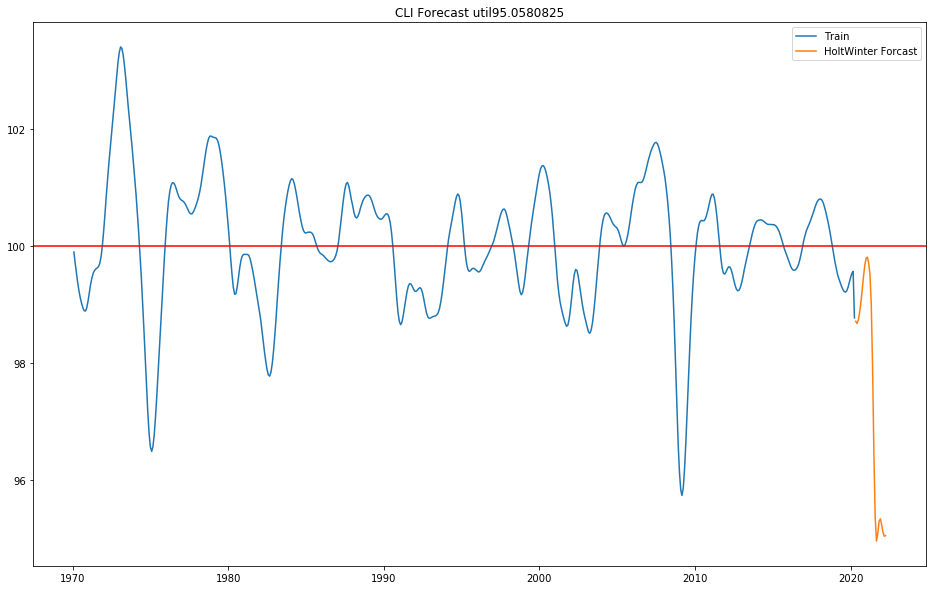

In [270]:
exp_smooth_fit= sm.tsa.ExponentialSmoothing(all_df['Value'],
                                           seasonal_periods=41,#Use the same parameter as before
                                           trend='add',
                                           seasonal='add',
                                           damped=True).fit()
#all_df= all_df[all_df['Date'] >='2020-01-01']


months_out=24

new_dates=[]
for month_ in range(1, months_out+1):
    nextmonth= pd.to_datetime(str(all_df['Date'].values[-1])) +relativedelta.relativedelta(months=month_)
    new_dates.append(nextmonth)
    
new_data= exp_smooth_fit.forecast(months_out)
future_df= pd.DataFrame({'Date':new_data, 'Value': new_data})
future_df.tail()

fig,ax = plt.subplots(figsize=(16,10))

plt.plot( all_df['Value'], label='Train')
plt.plot(future_df['Value'],label='HoltWinter Forcast')
ax.axhline(y=100, color='red')

plt.legend(loc='best')
plt.title('CLI Forecast util'+ str(future_df['Date'].values[-1])[0:10])
plt.show()

### WebApp

- Anything that is trained will be saved in the global variables. This is where all the clients will be accesing the data from; all clients will be sharing the same trained resource.


- The startup function gets called only once when starting the server. Make sure you call the global variables so that functions seperates them from other variables. Once the model is trained using the latest data it is ready to yield future CLI values whilst being saved in memory.

In [2]:
import statsmodels.api as sm
import datetime
from dateutil import relativedelta

#Global Variable
exp_smooth_fit=None
cli_df=None

# load and prepare the data
def Startup():
    #The variables we will need after function runs
    global exp_smooth_fit, cli_df
    
    #load the cli data
    cli_raw=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.CLI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
    cli_df=cli_raw[cli_raw['LOCATION'] =='OECD']
    
    full_date_list=[]
    for tm in cli_df['TIME']:
        year=int(tm.split('-')[0])
        month=int(tm.split('-')[1])
        #print calendar full date
        full_date_list.append(tm + '-'+str(calendar.monthrange(year,month)[1]))
        
    cli_df['Date'] = full_date_list
    cli_df['Date']= pd.to_datetime(cli_df['Date'])
    cli_df=cli_df[['Date','Value']]
    cli_df.index=cli_df['Date']
    
    
    
    
    #train the model on all existing data
    exp_smooth_fit=sm.tsa.ExponentialSmoothing(cli_df['Value'], seasonal_periods=10,
                                              trend='add', seasonal='add', damped=True).fit()
    
    
def GetForecast(months_out):
    
    new_dates=[]
    for month_ in range(1,months_out+1):
        nextmonth=pd.to_datetime(str(cli_df['Date'].values[-1]))+relativedelta.relativedelta(month=month_)
        new_dates.append(nextmonth)
    

   
    
    new_data= exp_smooth_fit.forecast(months_out)
    future_df=pd.DataFrame({'Date':new_dates,'Value':new_data})
    future_df.index=future_df['Date']
    
    print(cli_df['Date'][-1])
    print(future_df['Date'][0])
    
    fig,ax = plt.subplots(figsize=(16,10))
    plt.plot(future_df['Value'], label='Holt Winter Forcast', linewidth=5)
    plt.plot(cli_df['Value'], label='Train')

    ax.axhline(y=100,color='gray')
    plt.legend(loc='best')
    plt.title('CLI Forecast Util '+ str(future_df['Date'].values[-1])[0:10])
    plt.show()
    
    
    

- When we call the Startup() function it will run and do feature engineering and train the model. It will then save the model and cli into as the global variables for users t access


- We will be training on the web whenever the server starts or reboots

In [3]:
Startup()
GetForecast(12)

NameError: name 'pd' is not defined